In [1]:
from cleanning_data import cleanning_data
from datetime import datetime

frame = cleanning_data.df


for fecha in frame.fecha_entrega:
    frame["fecha_entregasmpt"] = datetime.fromisoformat(str(fecha)).timestamp()
    
for fecha in frame.fecha_ultima:
    frame["fecha_ultimampt"] = datetime.fromisoformat(str(fecha)).timestamp()
    
for fecha in frame.fecha_penultima:
    frame["fecha_penultimampt"] = datetime.fromisoformat(str(fecha)).timestamp()
    
for fecha in frame.fecha_antepenultima:
    frame["fecha_antepenultimampt"] = datetime.fromisoformat(str(fecha)).timestamp()
     
#print(frame[["fecha_entregasmpt", "fecha_ultimampt", "fecha_penultimampt", "fecha_antepenultimampt"]])
frame.info()


<class 'pandas.core.frame.DataFrame'>
Index: 231390 entries, 0 to 11700
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      231390 non-null  int64         
 1   fecha_entrega           231390 non-null  datetime64[ns]
 2   fecha_ultima            231390 non-null  datetime64[ns]
 3   fecha_penultima         231390 non-null  datetime64[ns]
 4   fecha_antepenultima     231390 non-null  datetime64[ns]
 5   kms_ultima              231390 non-null  int64         
 6   kms_penultima           231390 non-null  int64         
 7   kms_antepenultima       231390 non-null  int64         
 8   dias_para_5000          231390 non-null  int64         
 9   source_file             231390 non-null  object        
 10  fecha_entregasmpt       231390 non-null  float64       
 11  fecha_ultimampt         231390 non-null  float64       
 12  fecha_penultimampt      231390 non-n

In [2]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
import pandas as pd


ct = ColumnTransformer(
    [
        ("scale", StandardScaler(), make_column_selector(dtype_include=np.int64)),
        ("scale2", StandardScaler(), make_column_selector(dtype_include=np.float64))
    ],
    remainder="drop"
)
ct.fit_transform(frame)

data_frame_scalado = pd.DataFrame(ct.fit_transform(frame), columns=ct.get_feature_names_out())

data_frame_scalado

frame

,id,fecha_entrega,fecha_ultima,fecha_penultima,fecha_antepenultima,kms_ultima,kms_penultima,kms_antepenultima,dias_para_5000,source_file,fecha_entregasmpt,fecha_ultimampt,fecha_penultimampt,fecha_antepenultimampt
0,1,1900-01-01,2022-03-29,2021-11-03,1900-01-01,123344,115231,0,0,entrenamiento_IA_parte_2.csv,1.420261e+09,1.420261e+09,-2.208971e+09,-2.208971e+09
1,2,1900-01-01,2021-09-27,2021-08-19,1900-01-01,112446,109473,0,0,entrenamiento_IA_parte_2.csv,1.420261e+09,1.420261e+09,-2.208971e+09,-2.208971e+09
2,3,1900-01-01,2021-03-31,1900-01-01,1900-01-01,135976,0,0,0,entrenamiento_IA_parte_2.csv,1.420261e+09,1.420261e+09,-2.208971e+09,-2.208971e+09
3,4,1900-01-01,2021-03-05,1900-01-01,1900-01-01,191772,0,0,0,entrenamiento_IA_parte_2.csv,1.420261e+09,1.420261e+09,-2.208971e+09,-2.208971e+09
4,5,1900-01-01,2022-03-25,2022-03-11,1900-01-01,22,2,0,1,entrenamiento_IA_parte_2.csv,1.420261e+09,1.420261e+09,-2.208971e+09,-2.208971e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,11697,1900-01-01,2020-01-03,2018-05-25,2017-01-24,82641,56205,37364,0,entrenamiento_IA_parte_6.csv,1.420261e+09,1.420261e+09,-2.208971e+09,-2.208971e+09
11697,11698,1900-01-01,2016-07-02,2016-06-04,2015-07-07,10453,9786,4998,0,entrenamiento_IA_parte_6.csv,1.420261e+09,1.420261e+09,-2.208971e+09,-2.208971e+09
11698,11699,1900-01-01,2015-12-21,1900-01-01,1900-01-01,163769,0,0,0,entrenamiento_IA_parte_6.csv,1.420261e+09,1.420261e+09,-2.208971e+09,-2.208971e+09
11699,11700,1900-01-01,2018-02-07,2018-02-03,2016-07-30,28231,28139,16101,1,entrenamiento_IA_parte_6.csv,1.420261e+09,1.420261e+09,-2.208971e+09,-2.208971e+09


In [49]:
from sklearn.model_selection import train_test_split

X = data_frame_scalado[["scale2__fecha_entregasmpt", "scale2__fecha_ultimampt", "scale2__fecha_penultimampt", "scale2__fecha_antepenultimampt", "scale__kms_ultima", "scale__kms_penultima", "scale__kms_antepenultima"]]
y = frame["dias_para_5000"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

y_train

48910    0
10089    1
70495    0
10537    1
10917    0
        ..
953      0
18922    0
15268    0
23785    0
52343    0
Name: dias_para_5000, Length: 161973, dtype: int64

In [51]:

from sklearn.linear_model import Perceptron

perceptron = Perceptron(
    # --------------------------------------------------------------------------
    # Specify the norm of the penalty:
    # * None: no penalty is added.
    # * 'l2': add a L2 penalty term and it is the default choice.
    # * 'l1': add a L1 penalty term.
    # * 'elasticnet': both L1 and L2 penalty terms are added.
    penalty=None,
    # --------------------------------------------------------------------------
    # Constant that multiplies the regularization term if regularization is
    # used.
    alpha=0.0001,
    # --------------------------------------------------------------------------
    # The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0
    # corresponds to L2 penalty, l1_ratio=1 to L1. Only used if
    # penalty='elasticnet'.
    l1_ratio=0.9,
    # --------------------------------------------------------------------------
    # Whether the intercept should be estimated or not. If False, the data is
    # assumed to be already centered.
    fit_intercept=True,
    # --------------------------------------------------------------------------
    # The maximum number of passes over the training data (aka epochs). It only
    # impacts the behavior in the fit method, and not the partial_fit method.
    max_iter=100000,
    # --------------------------------------------------------------------------
    # The stopping criterion. If it is not None, the iterations will stop when
    # (loss > previous_loss - tol).
    tol=1e-3,
    # --------------------------------------------------------------------------
    # Whether or not the training data should be shuffled after each epoch.
    shuffle=True,
    # --------------------------------------------------------------------------
    # Constant by which the updates are multiplied.
    eta0=1,
    # --------------------------------------------------------------------------
    # Used to shuffle the training data, when shuffle is set to True. Pass an
    # int for reproducible output across multiple function calls.
    random_state=2,
    # --------------------------------------------------------------------------
    # Whether to use early stopping to terminate training when validation. score
    # is not improving. If set to True, it will automatically set aside a
    # stratified fraction of training data as validation and terminate training
    # when validation score is not improving by at least tol for
    # n_iter_no_change consecutive epochs.
    early_stopping=True,
    # --------------------------------------------------------------------------
    # The proportion of training data to set aside as validation set for early
    # stopping. Must be between 0 and 1. Only used if early_stopping is True.
    validation_fraction=0.01,
    # --------------------------------------------------------------------------
    # Number of iterations with no improvement to wait before early stopping.
    n_iter_no_change=10,
    # --------------------------------------------------------------------------
    # Weights associated with classes. If not given, all classes are supposed to
    # have weight one. The “balanced” mode uses the values of y to automatically
    # adjust weights inversely proportional to class frequencies in the input
    # data as n_samples / (n_classes * np.bincount(y)).
    class_weight=None,
    # --------------------------------------------------------------------------
    # When set to True, reuse the solution of the previous call to fit as
    # initialization, otherwise, just erase the previous solution.
    warm_start=True,
)

perceptron.fit(x_test, y_test)

y_pred = perceptron.predict(x_train)

perceptron.score(x_train, y_train)


0.528514011594525

In [52]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
confusion_matrix(
    # -------------------------------------------------------------------------
    # Ground truth (correct) target values.
    y_true=y_train,
    # -------------------------------------------------------------------------
    # Estimated targets as returned by a classifier.
    y_pred=y_pred,
    # -------------------------------------------------------------------------
    # List of labels to index the matrix.
    labels=None,
    # -------------------------------------------------------------------------
    # Normalizes confusion matrix over the true (rows), predicted (columns)
    # conditions or all the population.
    # 'true', 'pred', 'all'
    normalize=None,
)
)


,0,1
0,72834,15113
1,61255,12771


[[31236  6520]
 [26175  5486]]


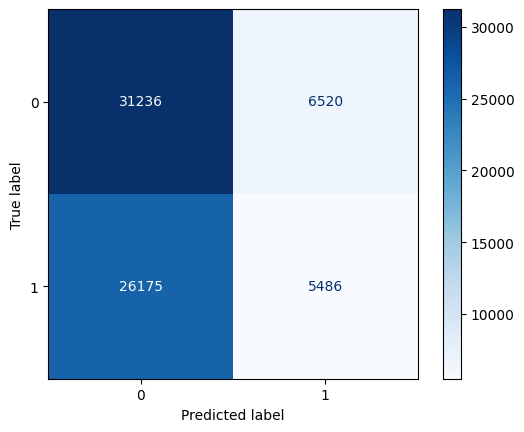

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
    perceptron,
    x_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=None,
)

print(disp.confusion_matrix)

plt.show()